In [5]:
import numpy as np
import polars as pl
# import bambi as bm
# import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from itertools import combinations 
# import plotnine as p
import pandas as pd

## OLS

In [6]:
# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)


In [7]:
np.random.seed(1)

tb = pd.DataFrame({
    'x': np.random.normal(size=10000),
    'u': np.random.normal(size=10000)})
tb['y'] = 5.5*tb['x'].values + 12*tb['u'].values


reg_tb = sm.OLS.from_formula('y ~ x', data=tb).fit()

reg_tb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     2237.
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:20:39   Log-Likelihood:                -39049.
No. Observations:               10000   AIC:                         7.810e+04
Df Residuals:                    9998   BIC:                         7.812e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1114      0.120      0.927      0.354      -0.124       0.347
x              5.6887      0.120     47.293      0.000       5.453       5.924
==============================================================================
Omnibus:                        0.640   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.726   Jarque-Bera (JB):                0.672
Skew:                          -0.012   Prob(JB):                        0.715
Kurtosis:                       2.968   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:

tb['yhat1'] = reg_tb.predict(tb)
tb['yhat2'] = 0.1114 + 5.6887*tb['x']
tb['uhat1'] = reg_tb.resid
tb['uhat2'] = tb['y'] - tb['yhat2']

tb.describe()


,x,u,y,yhat1,yhat2,uhat1,uhat2
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,0.009773,0.009435,0.166975,0.166975,0.166994,-1.691092e-16,-0.000019
std,0.998836,1.001239,13.289365,5.682040,5.682077,1.201339e+01,12.013394
min,-3.656440,-3.451403,-50.654682,-20.688875,-20.688991,-4.142425e+01,-41.424248
25%,-0.662925,-0.672294,-8.827691,-3.659775,-3.659781,-8.199882e+00,-8.199908
50%,0.008454,0.018803,0.242724,0.159473,0.159493,4.497835e-02,0.044993
75%,0.671809,0.688683,9.232769,3.933075,3.933119,8.147307e+00,8.147305
max,4.026849,4.168118,48.162716,23.018769,23.018936,5.000751e+01,50.007515


In [9]:
reg_tb.params

Intercept    0.111381
x            5.688663
dtype: float64

In [10]:
p.ggplot(tb, p.aes(x='x', y='y')) +\
    p.ggtitle("OLS Regression Line") +\
    p.geom_point(size = 0.05, color = "black", alpha = 0.5) +\
    p.geom_smooth(p.aes(x='x', y='y'), method = "lm", color = "black") +\
    p.annotate("text", x = -1.5, y = 30, color = "red", 
             label = "Intercept = {}".format(-0.0732608)) +\
    p.annotate("text", x = 1.5, y = -30, color = "blue", 
             label = "Slope = {}".format(5.685033))

NameError: name 'p' is not defined

### Residual plot

In [11]:
p.ggplot(tb, p.aes(x='yhat1', y='uhat1')) +\
    p.ggtitle("OLS Regression Line") +\
    p.geom_point(size = 0.05, color = "black", alpha = 0.5) +\
    p.geom_smooth(p.aes(x='yhat1', y='uhat1'), method = "lm", color = "black") +\
    p.xlab("Predicted Values") +\
    p.ylab("Residuals")
    
    # p.annotate("text", x = -1.5, y = 30, color = "red", 
    #          label = "Intercept = {}".format(-0.0732608)) +\
    # p.annotate("text", x = 1.5, y = -30, color = "blue", 
    #          label = "Slope = {}".format(5.685033))

NameError: name 'p' is not defined

### 2.14 Algebraic Properties of OLS

In [12]:
tb = pd.DataFrame({
    'x': 9*np.random.normal(size=10),
    'u': 36*np.random.normal(size=10)})
tb['y'] = 3*tb['x'].values + 2*tb['u'].values

reg_tb = sm.OLS.from_formula('y ~ x', data=tb).fit()

tb['yhat1'] = reg_tb.predict(tb)
tb['uhat1'] = reg_tb.resid
tb['x_uhat1'] = tb['x']*tb['uhat1']
tb['yhat1_uhat1'] = tb['yhat1']*tb['uhat1']

tb.describe()

,x,u,y,yhat1,uhat1,x_uhat1,yhat1_uhat1
count,10.000000,10.000000,10.000000,10.000000,1.000000e+01,1.000000e+01,1.000000e+01
mean,-0.844111,7.893200,13.254067,13.254067,-1.421085e-15,-6.252776e-14,-5.456968e-13
std,8.542685,30.996325,76.997388,53.502037,5.537265e+01,4.479978e+02,3.310240e+03
min,-17.384075,-39.860946,-131.874117,-90.334179,-1.118474e+02,-1.033055e+03,-8.543651e+03
25%,-4.565266,-20.063648,-32.853301,-10.051177,-3.032067e+01,-6.885465e+01,-3.022536e+02
50%,-1.649420,15.001222,19.110051,8.210495,1.823321e+01,-2.198493e+01,2.727673e+02
75%,6.298850,35.952517,68.586508,57.989762,3.540118e+01,2.337913e+02,1.805439e+03
max,10.207313,39.731946,108.705561,82.468100,5.930470e+01,7.221334e+02,3.752476e+03


In [13]:
reg_tb.summary()

/home/codespace/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     7.469
Date:                Wed, 03 Apr 2024   Prob (F-statistic):             0.0257
Time:                        23:20:45   Log-Likelihood:                -53.803
No. Observations:                  10   AIC:                             111.6
Df Residuals:                       8   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.5407     18.673      0.993      0.350     -24.519      61.601
x              6.2629      2.292      2.733      0.026       0.978      11.548
==============================================================================
Omnibus:                        2.616   Durbin-Watson:                   2.598
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.413
Skew:                          -0.900   Prob(JB):                        0.493
Kurtosis:                       2.610   Cond. No.                         8.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Error Decomposition

In [14]:
SST = np.sum((tb['y'] - np.mean(tb['y']))**2)
SSR = np.sum((tb['y'] - tb['yhat1'])**2)
SSE = np.sum((tb['yhat1'] - np.mean(tb['y']))**2)

np.round(SST, 2) == np.round(SSR + SSE, 2)
R_squared = SSE/SST

print("SST: {}".format(SST))
print("SSR: {}".format(SSR))
print("SSE: {}".format(SSE))
print("R-squared: {}".format(R_squared))


SST: 53357.38036608548
SSR: 27595.168780053133
SSE: 25762.211586032347
R-squared: 0.4828237707563147


### Expected Value of OLS

In [15]:
beta_estimate = []
for i in range(1000):
    tb = pd.DataFrame({
    'x': 9*np.random.normal(size=10000),
    'u': 36*np.random.normal(size=10000)})
    tb['y'] = 3 + 2*tb['x'].values + tb['u'].values
    reg_tb = sm.OLS.from_formula('y ~ x', data=tb).fit()
    beta_estimate.append(reg_tb.params['x'])

print("Mean of beta estimates: {}".format(np.mean(beta_estimate)))
p.ggplot() +\
  p.geom_histogram(p.aes(x=beta_estimate), binwidth = 0.01)

Mean of beta estimates: 1.9992287298351525


NameError: name 'p' is not defined

### 2.25

In [17]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p

# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)


auto = pd.read_stata('https://github.com/scunning1975/mixtape/raw/master/auto.dta')
auto['length'] = auto['length'] - auto['length'].mean()

lm1 = sm.OLS.from_formula('price ~ length', data=auto).fit()
lm2 = sm.OLS.from_formula('price ~ length + weight + headroom + mpg', data=auto).fit()


/tmp/ipykernel_6347/2142396724.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/tmp/ipykernel_6347/2142396724.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/home/codespace/.python/current/lib/python3.10/site-packages/plotnine/stats/smoothers.py:338: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/codespace/.python/current/lib/python3.10/site-packages/plotnine/stats/smoothers.py:338: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


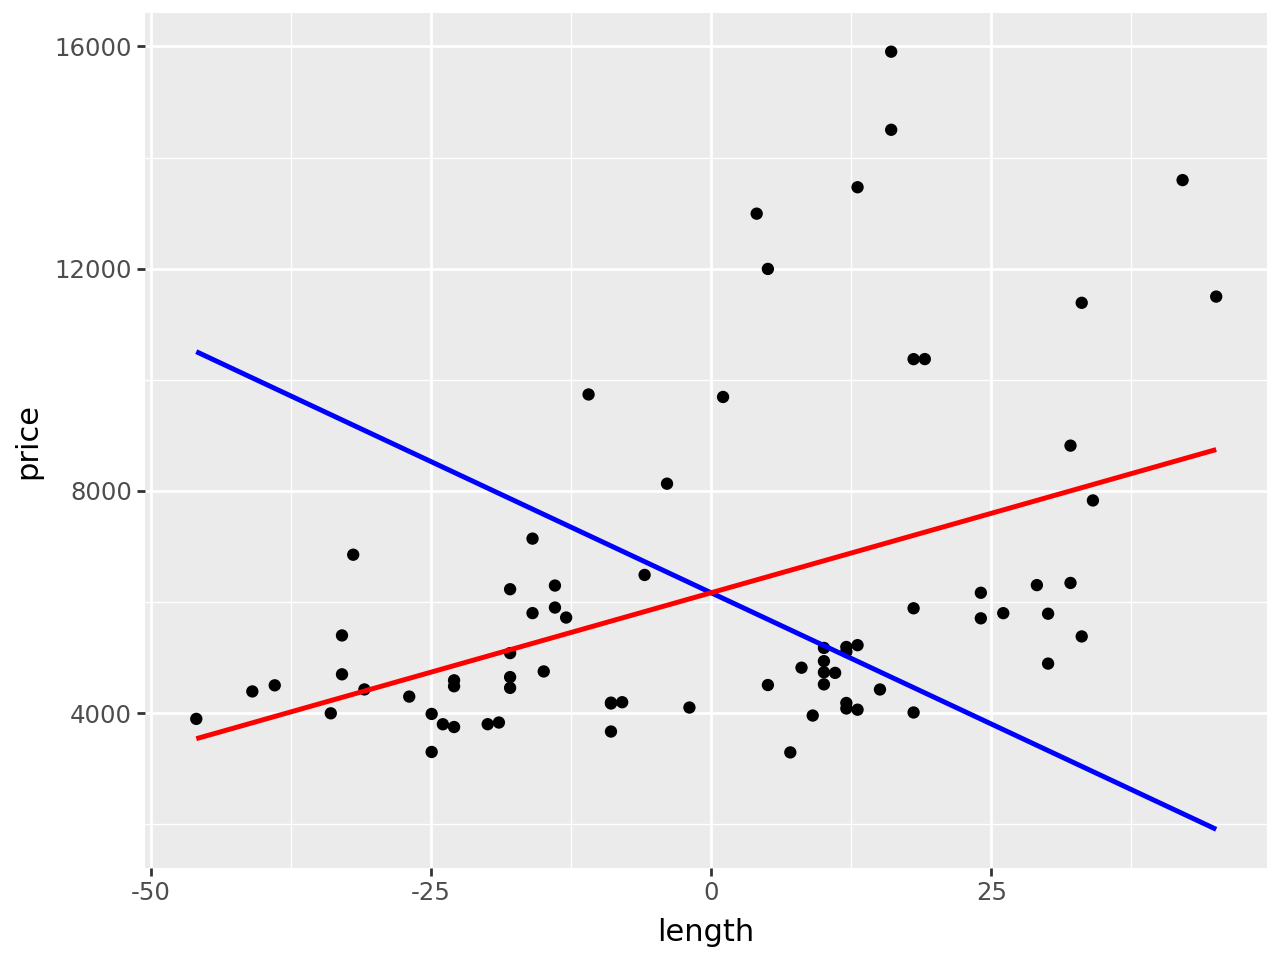

In [22]:
coef_lm1 = lm1.params
coef_lm2 = lm2.params
resid_lm2 = lm2.resid

auto['y_single'] = coef_lm1[0] + coef_lm1[1]*auto['length']
auto['y_multi'] = coef_lm1[0] + coef_lm2[1]*auto['length']


p.ggplot(auto) +\
  p.geom_point(p.aes(x = 'length', y = 'price')) +\
  p.geom_smooth(p.aes(x = 'length', y = 'y_multi'), color = "blue") +\
  p.geom_smooth(p.aes(x = 'length', y = 'y_single'), color="red")

### 2.27 Cluster robust standard errors

In [23]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p

# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)


In [24]:

def gen_cluster(param = (.1, .5), n = 1000, n_cluster = 50, rho = .5):
    # Function to generate clustered data

    # individual level
    Sigma_i = np.array((1, 0, 0, 1 - rho)).reshape(2,2)

    values_i = np.random.multivariate_normal(np.zeros(2), Sigma_i, size = n)

    # cluster level
    cluster_name = np.repeat(np.arange(1, n_cluster+1), repeats = n / n_cluster)
    Sigma_cl = np.array((1, 0, 0, rho)).reshape(2,2)
    values_cl = np.random.multivariate_normal(np.zeros(2),Sigma_cl, size = n_cluster)

    # predictor var consists of individual- and cluster-level components
    x = values_i[: , 0] + np.repeat(values_cl[: , 0], repeats = n / n_cluster)

    # error consists of individual- and cluster-level components
    error = values_i[: , 1] + np.repeat(values_cl[: , 1], repeats = n / n_cluster)

    # data generating process
    y = param[0] + param[1]*x + error
    
    df = pd.DataFrame({'x':x, 'y':y, 'cluster': cluster_name})
    return df

def cluster_sim(param = (.1, .5), n = 1000, n_cluster = 50,
                        rho = .5, cluster_robust = False):

    df = gen_cluster(param = param, n = n , n_cluster = n_cluster, rho = rho)

    if not cluster_robust:
        fit = sm.OLS.from_formula('y ~ x', data = df).fit()
    else: # cluster-robust SE
        fit = sm.OLS.from_formula('y ~ x', data = df).fit(cov_type='cluster', cov_kwds={'groups': df['cluster']})
    
    b1 = fit.params[1]
    Sigma = fit.cov_params()   
    
    se = np.sqrt(np.diag(Sigma)[1])
    ci95 = se*1.96
    b1_ci95 = (b1-ci95, b1+ci95)

    return (b1, se, *b1_ci95)

def run_cluster_sim(n_sims = 1000, param = (.1, .5), n = 1000,
                            n_cluster = 50, rho = .5, cluster_robust = False):

    res = [cluster_sim(param = param, n = n, rho = rho,
                                      n_cluster = n_cluster,
                                      cluster_robust = cluster_robust) for x in range(n_sims)]
    df = pd.DataFrame(res)
    df.columns = ('b1', 'se_b1', 'ci95_lower', 'ci95_upper')
    df['param_caught'] = (df['ci95_lower'] <= param[1]) & (param[1] <= df['ci95_upper'])
    df['id'] = df.index
    return df


In [45]:
# Simulation no clustered SE
sim_params = [.4, 0] # beta1 = 0: no effect of x on y
sim_nocluster = run_cluster_sim(n_sims=1000, param = sim_params, rho=0, cluster_robust = False)

/tmp/ipykernel_6347/2339217186.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/tmp/ipykernel_6347/2339217186.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/tmp/ipykernel_6347/2339217186.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/tmp/ipykernel_6347/2339217186.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consiste

/home/codespace/.python/current/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 25'. Pick better value with 'binwidth'.


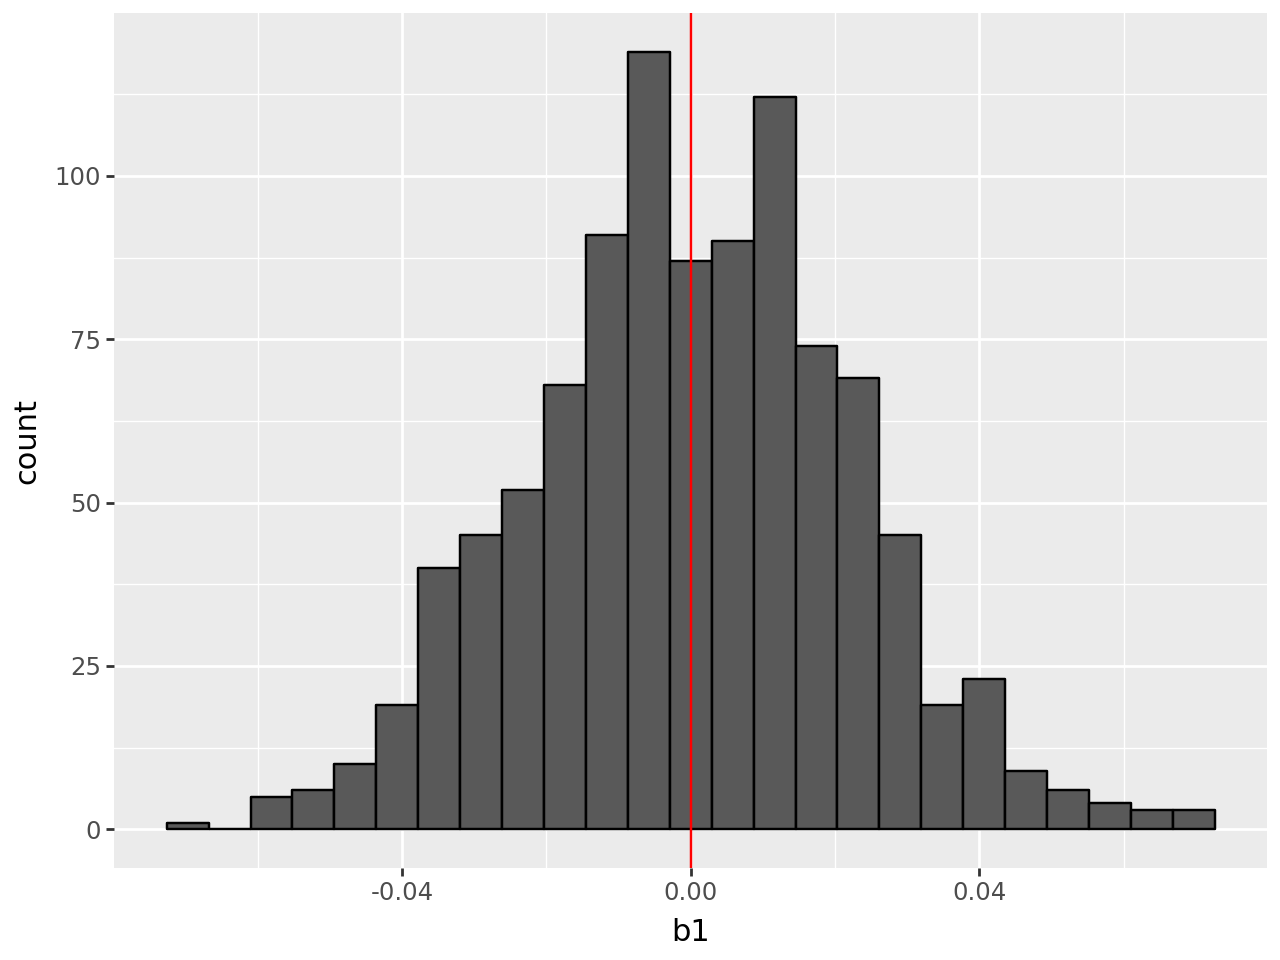

In [46]:

p.ggplot(sim_nocluster, p.aes('b1')) +\
  p.geom_histogram(color = 'black') +\
  p.geom_vline(xintercept = sim_params[1], color = 'red')

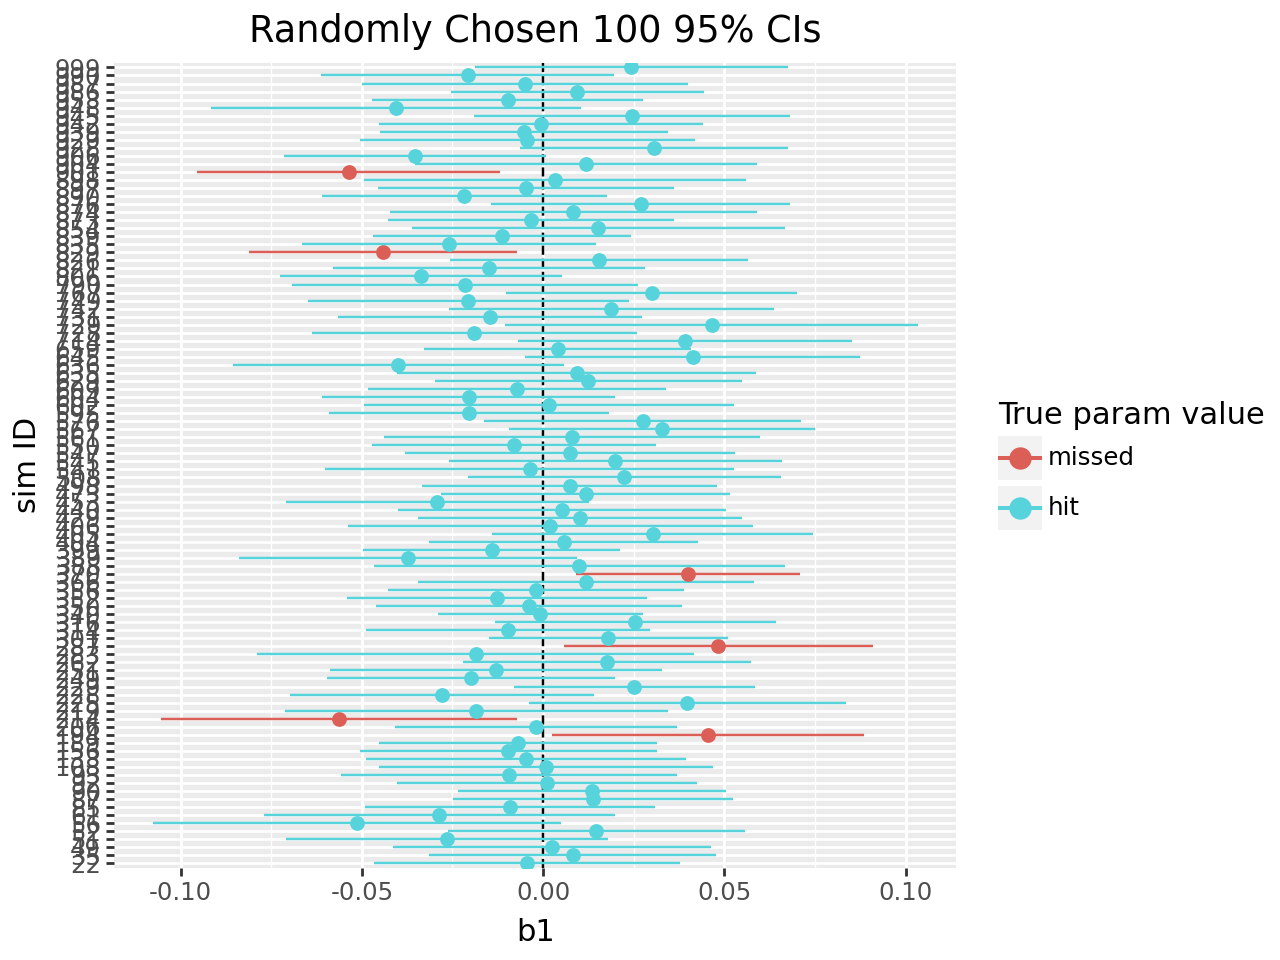

In [47]:
p.ggplot(sim_nocluster.sample(100).sort_values('b1'),
                         p.aes(x = 'factor(id)', y = 'b1', 
                             ymin = 'ci95_lower', ymax = 'ci95_upper',
                             color = 'param_caught')) +\
  p.geom_hline(yintercept = sim_params[1], linetype = 'dashed') +\
  p.geom_pointrange() +\
  p.labs(x = 'sim ID', y = 'b1', title = 'Randomly Chosen 100 95% CIs') +\
  p.scale_color_discrete(name = 'True param value', labels = ('missed', 'hit')) +\
  p.coord_flip()




In [39]:
1 - sum(sim_nocluster.param_caught)/sim_nocluster.shape[0]

0.04500000000000004

/tmp/ipykernel_6347/2339217186.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/tmp/ipykernel_6347/2339217186.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/tmp/ipykernel_6347/2339217186.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/tmp/ipykernel_6347/2339217186.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consiste

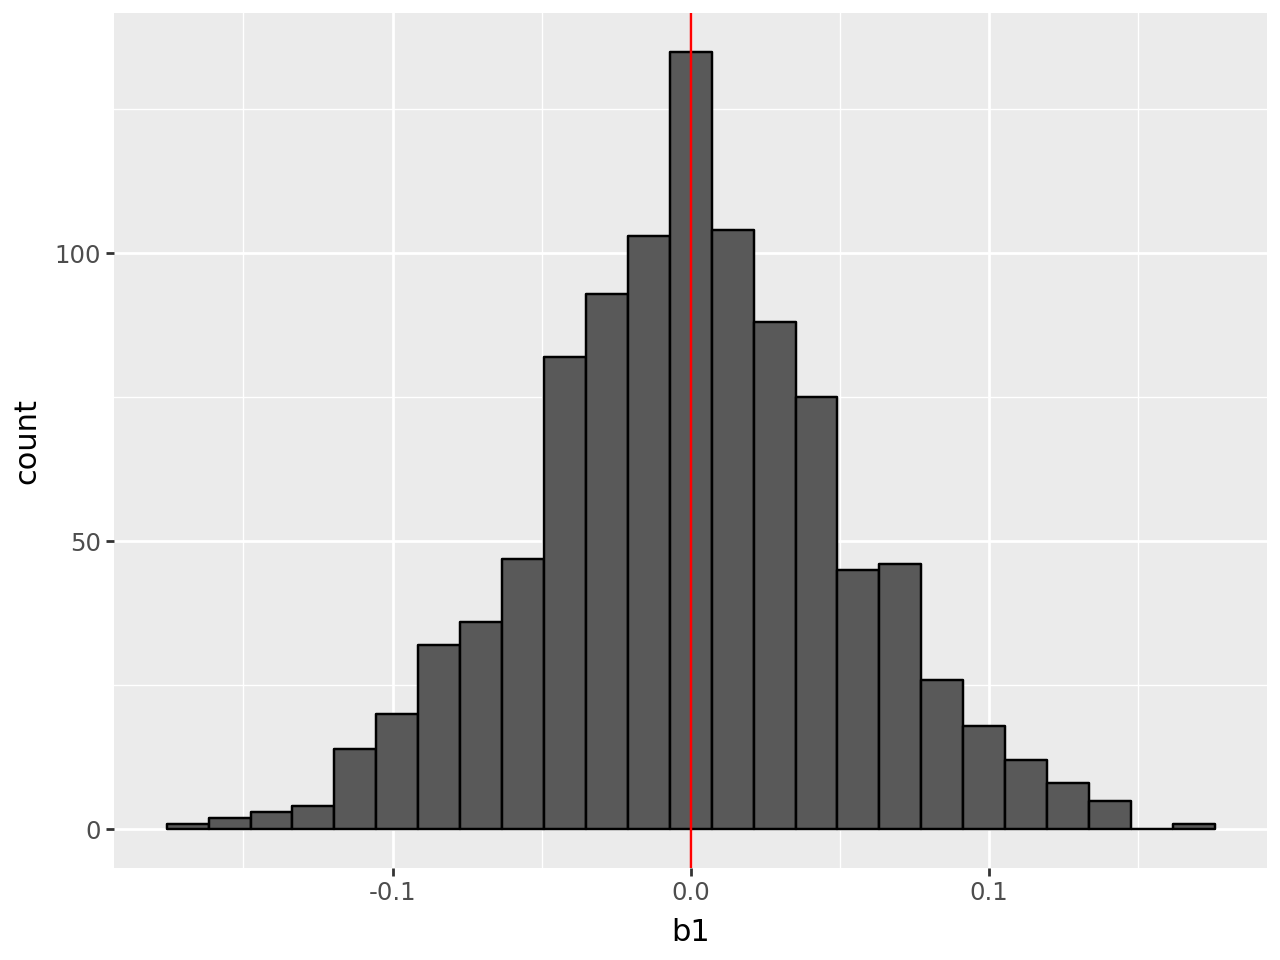

In [40]:

# Simulation clustered SE
sim_params = [.4, 0] # beta1 = 0: no effect of x on y
sim_nocluster = run_cluster_sim(n_sims=1000, param = sim_params, cluster_robust = False)

p.ggplot(sim_nocluster, p.aes('b1')) +  p.geom_histogram(color = 'black') +  p.geom_vline(xintercept = sim_params[1], color = 'red')

# 1 - sum(sim_nocluster.param_caught)/sim_nocluster.shape[0]

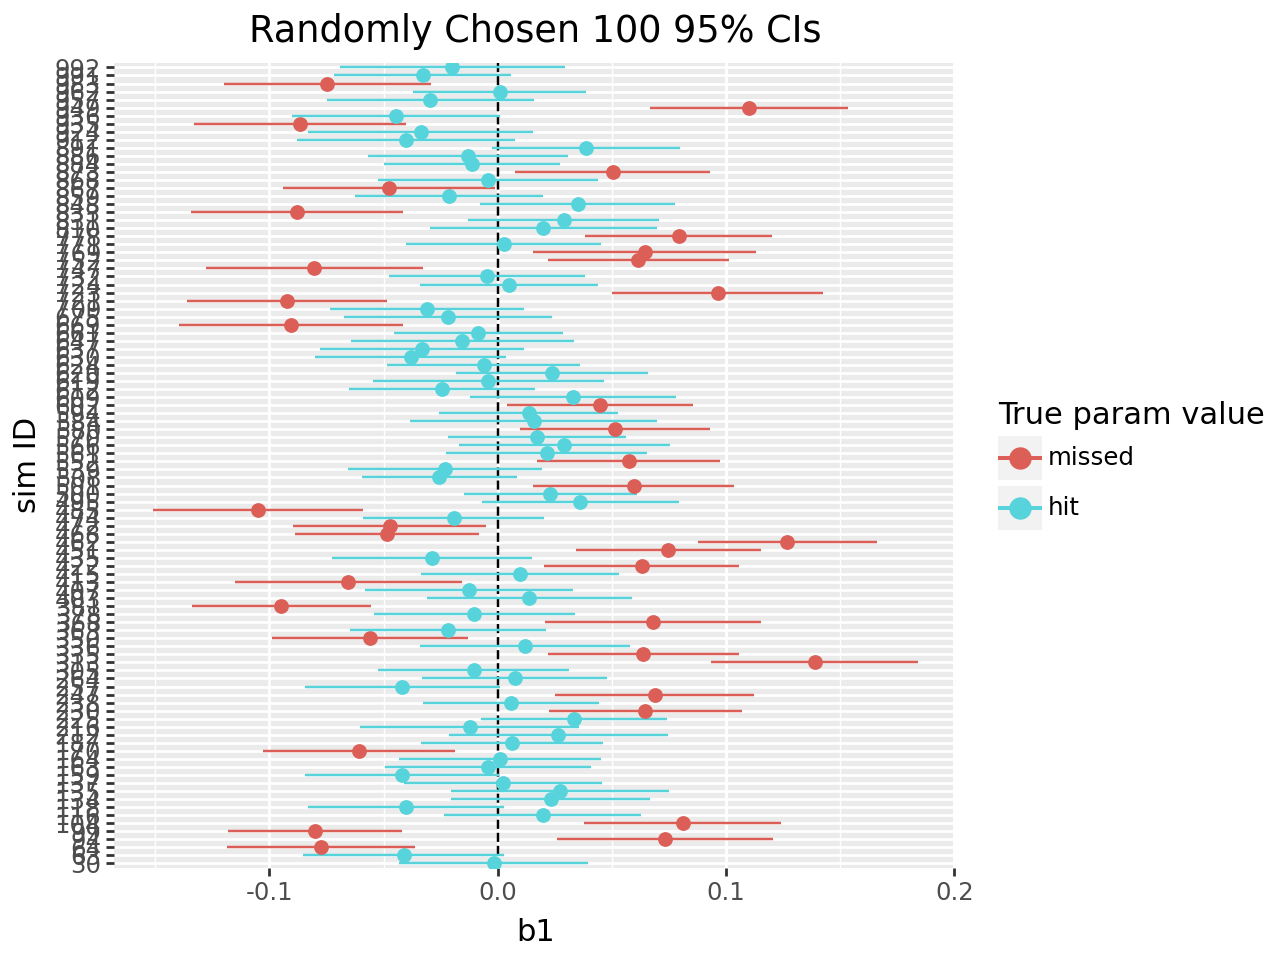

In [41]:
p.ggplot(sim_nocluster.sample(100).sort_values('b1'),
                         p.aes(x = 'factor(id)', y = 'b1', 
                             ymin = 'ci95_lower', ymax = 'ci95_upper',
                             color = 'param_caught')) +\
  p.geom_hline(yintercept = sim_params[1], linetype = 'dashed') +\
  p.geom_pointrange() +\
  p.labs(x = 'sim ID', y = 'b1', title = 'Randomly Chosen 100 95% CIs') +\
  p.scale_color_discrete(name = 'True param value', labels = ('missed', 'hit')) +\
  p.coord_flip()




/tmp/ipykernel_6347/2339217186.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/tmp/ipykernel_6347/2339217186.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/tmp/ipykernel_6347/2339217186.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/tmp/ipykernel_6347/2339217186.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consiste

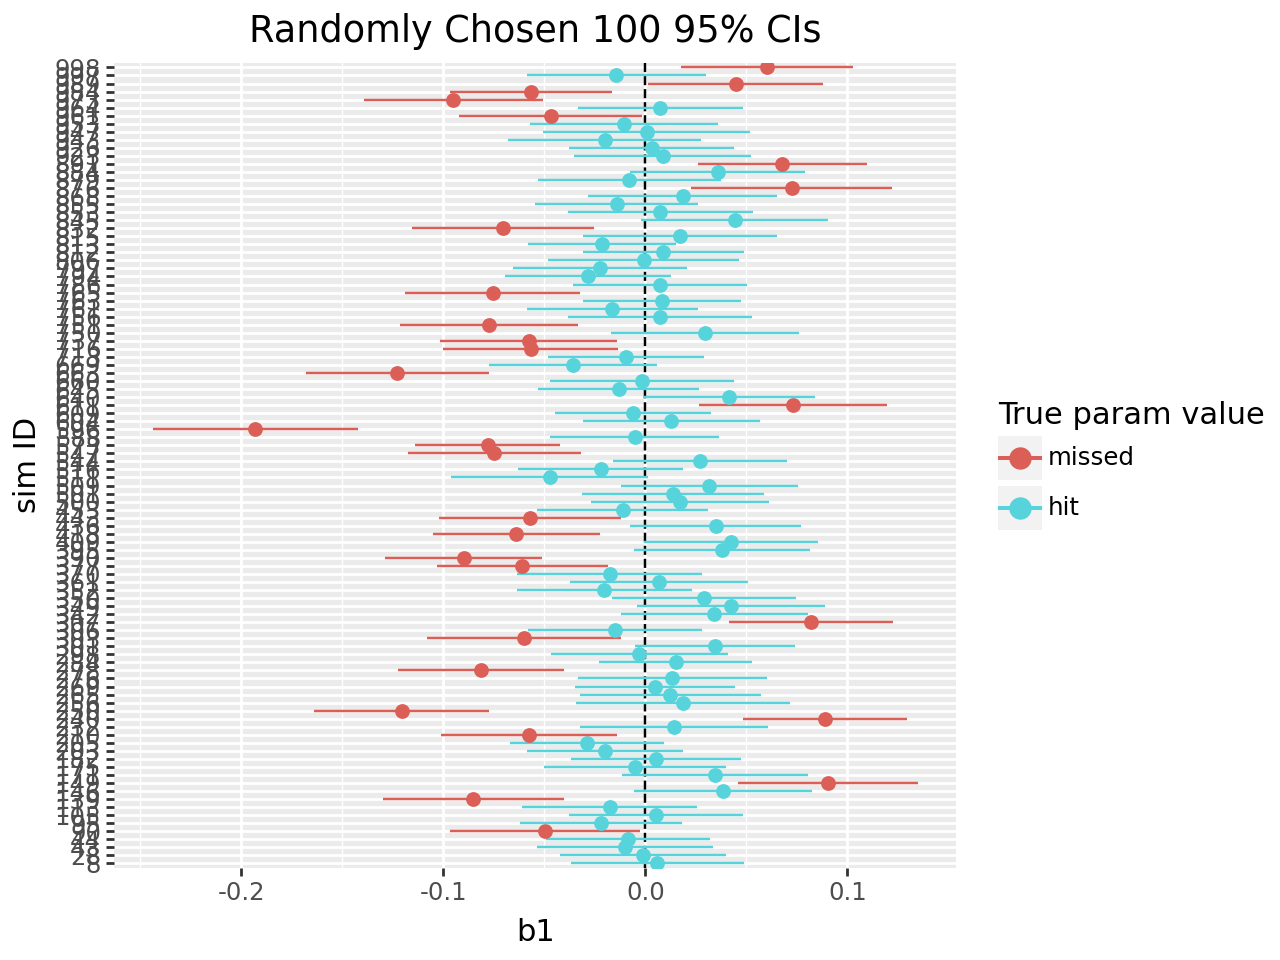

In [42]:
# Simulation clustered SE
sim_params = [.4, 0] # beta1 = 0: no effect of x on y
sim_nocluster = run_cluster_sim(n_sims=1000, param = sim_params, cluster_robust = False)


p.ggplot(sim_nocluster.sample(100).sort_values('b1'),
                         p.aes(x = 'factor(id)', y = 'b1', 
                             ymin = 'ci95_lower', ymax = 'ci95_upper',
                             color = 'param_caught')) +\
  p.geom_hline(yintercept = sim_params[1], linetype = 'dashed') +\
  p.geom_pointrange() +\
  p.labs(x = 'sim ID', y = 'b1', title = 'Randomly Chosen 100 95% CIs') +\
  p.scale_color_discrete(name = 'True param value', labels = ('missed', 'hit')) +\
  p.coord_flip()

In [43]:
# Simulation clustered SE
sim_params = [.4, 0] # beta1 = 0: no effect of x on y
sim_nocluster = run_cluster_sim(n_sims=1000, param = sim_params, cluster_robust = True)


1 - sum(sim_nocluster.param_caught)/sim_nocluster.shape[0]

/tmp/ipykernel_6347/2339217186.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/tmp/ipykernel_6347/2339217186.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/tmp/ipykernel_6347/2339217186.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/tmp/ipykernel_6347/2339217186.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consiste

0.06699999999999995

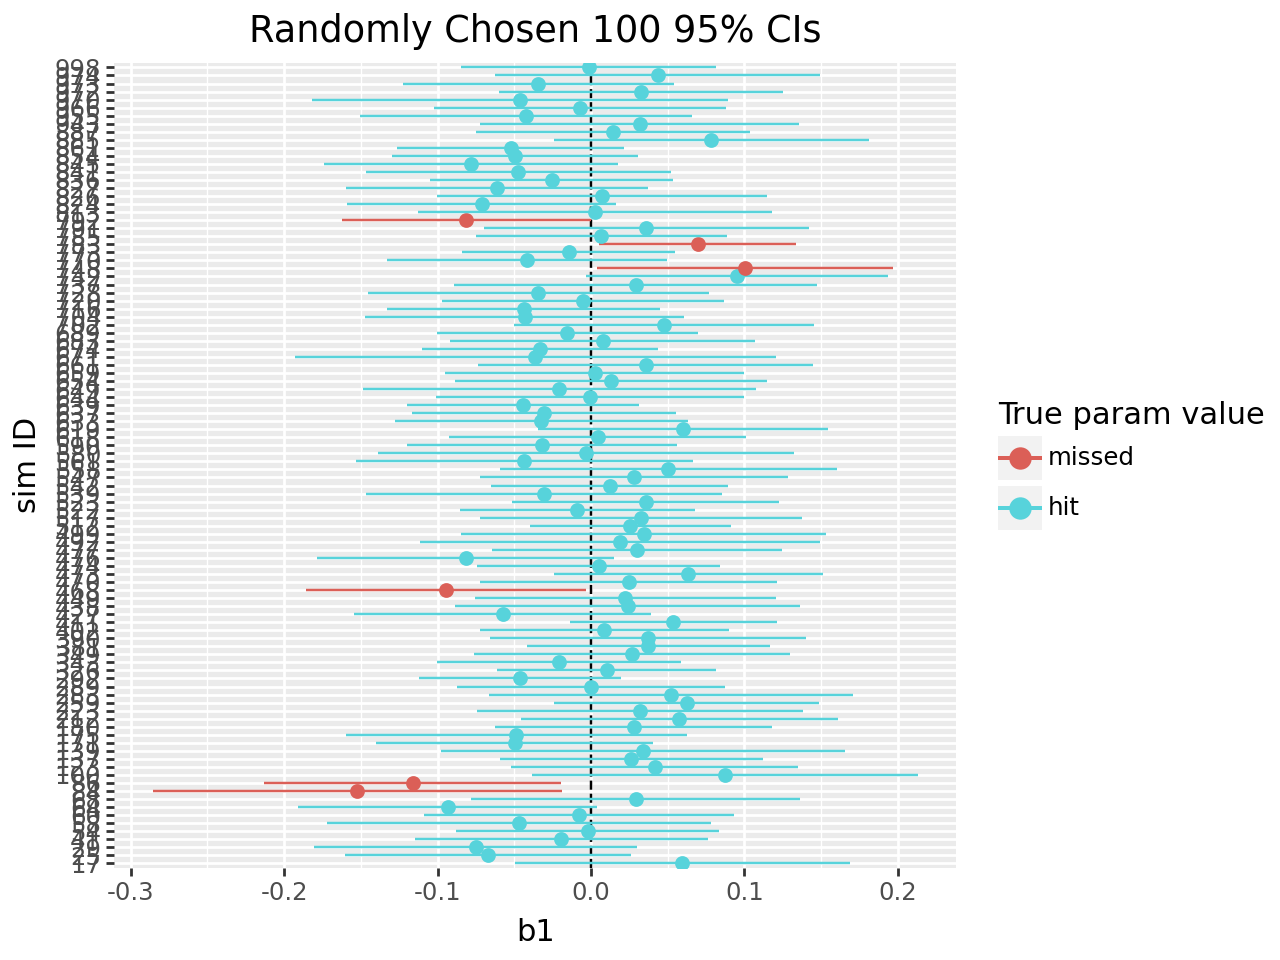

In [44]:
p.ggplot(sim_nocluster, p.aes('b1')) +  p.geom_histogram(color = 'black') +  p.geom_vline(xintercept = sim_params[1], color = 'red')

p.ggplot(sim_nocluster.sample(100).sort_values('b1'),
                         p.aes(x = 'factor(id)', y = 'b1', 
                             ymin = 'ci95_lower', ymax = 'ci95_upper',
                             color = 'param_caught')) +\
  p.geom_hline(yintercept = sim_params[1], linetype = 'dashed') +\
  p.geom_pointrange() +\
  p.labs(x = 'sim ID', y = 'b1', title = 'Randomly Chosen 100 95% CIs') +\
  p.scale_color_discrete(name = 'True param value', labels = ('missed', 'hit')) +\
  p.coord_flip()

